# First Level Analysis with Nilearn

[Nilearn](https://nilearn.github.io/stable/index.html) `GLM stats` module allows fast and easy MRI statistical analysis. It leverages `NiBabel` and other `Python` libraries.


## Accessing the preprocessed (fMRIprep) data

BIDS applications, such as `fMRIprep`, output data into a data structure similar to `BIDS` organization principals. And these data can also be inspected using [PyBIDS](https://bids-standard.github.io/pybids/index.html).


In [28]:
from bids.layout import BIDSLayout

ds_path = '../data'

# Initialize the BIDS layout and include the derivatives in it
layout = BIDSLayout(ds_path, derivatives = True)

## Model components

A GLM model has an **outcome** variable (the BOLD signal/our MRI images) and **predictors** (Events, Confounds).

### MRI images
We need to specify which MRI images we want to analyse. 

Here we will analyse single subject's 9 functional runs. Let's analyse **subject 04**.

With the `PyBIDS` we can easlily find the proprocessed files that we'd need for the analysis. Let's get the `sub-04` preprocessed functional **MNI** (`MNI152NLin2009cAsym`) space image files:

In [29]:
sID = '04'

bold = layout.get(
    subject = sID, 
    datatype = 'func', 
    space = 'MNI152NLin2009cAsym', 
    desc = 'preproc', 
    extension = '.nii.gz',
    return_type = 'filename'
)

print('\nSubject''s', sID, 'preprocessed functional images:')
print(*bold, sep='\n')


Subjects 04 preprocessed functional images:
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-02_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-03_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-04_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-05_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
/imaging/correia/da05/workshops/202

We will also specify the subject's anatomical image (warped to the standard space) to use it as a background image when plotting results. 

In [30]:
anat = layout.get(
    subject = sID, 
    datatype = 'anat', 
    space = 'MNI152NLin2009cAsym', 
    desc = 'preproc', 
    extension = '.nii.gz',
    return_type ='filename'
)

print('Subject''s', sID, 'preprocessed anatomical image:')
print(*anat, sep='\n')

Subjects 04 preprocessed anatomical image:
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/anat/sub-04_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz


### Events

We also need to specify the events that were happaning during the functional acquisitions. The events files are stored in the `func` foder and again we can use `PyBIDS` to find them.

In [31]:
events = layout.get(
    subject = sID, 
    datatype = 'func', 
    suffix = 'events', 
    extension = ".tsv", 
    return_type = 'filename'
)
print('Subject''s', sID, 'event files:')
print(*events, sep='\n')

Subjects 04 event files:
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-01_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-02_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-03_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-04_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-05_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-06_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-07_events.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/sub-04/func/sub-04_task-facerecognition_run-08_events.tsv
/imaging/correia/da05/workshops/2024-CB

### Confounds

Usually, we also want to include confounds computed during preprocessing (e.g., motion artifacts) as regressors of no interest. The confounds are computed by `fmriprep` and can be found in `derivatives/fmriprep/{sub}/func/` directory.

Let's find these files with `PyBIDS`.

In [32]:
confounds = layout.get(
    subject = sID, 
    datatype = 'func', 
    desc = 'confounds', 
    extension = ".tsv", 
    return_type = 'filename'
)

print('Subject''s', sID, 'confound files:')
print(*confounds, sep='\n')

Subjects 04 confound files:
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-01_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-02_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-03_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-04_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-05_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-06_desc-confounds_timeseries.tsv
/imaging/correia/da05/workshop

Let's get a list of all confound names from the first run's data.

In [33]:
confounds_run1 = pd.read_table(confounds[0])
list(confounds_run1)

['global_signal',
 'global_signal_derivative1',
 'global_signal_derivative1_power2',
 'global_signal_power2',
 'csf',
 'csf_derivative1',
 'csf_derivative1_power2',
 'csf_power2',
 'white_matter',
 'white_matter_derivative1',
 'white_matter_power2',
 'white_matter_derivative1_power2',
 'csf_wm',
 'tcompcor',
 'std_dvars',
 'dvars',
 'framewise_displacement',
 'rmsd',
 't_comp_cor_00',
 't_comp_cor_01',
 't_comp_cor_02',
 't_comp_cor_03',
 't_comp_cor_04',
 't_comp_cor_05',
 'c_comp_cor_00',
 'c_comp_cor_01',
 'c_comp_cor_02',
 'c_comp_cor_03',
 'c_comp_cor_04',
 'c_comp_cor_05',
 'c_comp_cor_06',
 'c_comp_cor_07',
 'w_comp_cor_00',
 'w_comp_cor_01',
 'w_comp_cor_02',
 'w_comp_cor_03',
 'w_comp_cor_04',
 'w_comp_cor_05',
 'w_comp_cor_06',
 'w_comp_cor_07',
 'w_comp_cor_08',
 'w_comp_cor_09',
 'w_comp_cor_10',
 'w_comp_cor_11',
 'w_comp_cor_12',
 'w_comp_cor_13',
 'w_comp_cor_14',
 'w_comp_cor_15',
 'w_comp_cor_16',
 'w_comp_cor_17',
 'w_comp_cor_18',
 'w_comp_cor_19',
 'w_comp_cor_20',


In [34]:
# Total number of confounds created:
len(list(confounds_run1))

223

The fMRIPrep pipeline generates a large array of possible confounds. The most well established confounding variables in neuroimaging are the six head-motion parameters (three rotations and three translations) - the common output of the head-motion correction (also known as realignment) of popular fMRI preprocessing software such as SPM or FSL. We will include them in our model. 

In [35]:
confounds_of_interest = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

Let's display the confounds of interest of the first run.

In [36]:
confounds_run1[confounds_of_interest]

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z
0,0.024759,-0.034865,-0.060334,-0.001189,0.000693,-0.000542
1,0.019648,0.028041,-0.054155,-0.001750,0.000463,-0.000542
2,0.015242,-0.024617,-0.052789,-0.001610,0.000693,-0.000542
3,0.019833,-0.060086,-0.060348,-0.001038,0.000114,-0.000542
4,0.017073,0.044619,-0.057765,-0.001268,0.000536,-0.000542
...,...,...,...,...,...,...
203,-0.069418,0.076988,-0.057274,0.002890,-0.000050,-0.000606
204,-0.069423,0.167336,-0.046008,0.002250,-0.000208,-0.000645
205,-0.069443,0.042688,-0.043118,0.003179,-0.000292,-0.000707
206,-0.069402,0.192808,-0.010475,0.002306,-0.000007,-0.000707


Now we need to get the confounds of interest of all nine runs. We will include them in our `GLM` model. 

We will create a list of confound tables (a list of 9 tables). 

In [37]:
confounds_glm = []
for conf_file in confounds:
    this_conf = pd.read_table(conf_file)
    conf_subset = this_conf[confounds_of_interest].fillna(0) # replace NaN with 0
    confounds_glm.append(conf_subset)
    
print(type(confounds_glm))
print(len(confounds_glm))

<class 'list'>
9


## Performing the GLM analysis

It is now time to create and estimate a ``FirstLevelModel`` object, that will generate the *design matrix*.



### Creating the First Level Model

In [38]:
from nilearn.glm.first_level import FirstLevelModel

There are a lot of important parameters one needs to define within a `FirstLevelModel` and the majority of them will have a prominent influence on your results. [Check the documentation!](https://nilearn.github.io/stable/modules/generated/nilearn.glm.first_level.FirstLevelModel.html)

For the model specification, we need the TR of the functional images, luckily we can extract this information with `PyBIDS`.

In [39]:
# Get the TR
TR = layout.get_tr()
print('TR:', TR)

TR: 2.0


Now we can specify the model with the parameters of our choice. Here we will specify the folowing:
* **t_r**, of course
* **slice_time_ref**: *This parameter indicates the time of the reference slice used in the slice timing preprocessing step of the experimental runs. It is expressed as a percentage of the t_r (time repetition), so it can have values between 0. and 1. Default=0.* Let's see if we get this information from our fMRIPrep Methods (*data/derivatives/fmriprep/logs/CITATION.html*). There we read: *"BOLD runs were slice-time corrected to 0.974s (0.5 of slice acquisition range 0s-1.95s)"*. This means, that **0.5** is the value we need to use for this parameter. 
* **hrf_model**: defines the HRF model to be used.
    * 

        ‘spm’: This is the HRF model used in SPM. See nilearn.glm.first_level.spm_hrf.

        ‘spm + derivative’: SPM model plus its time derivative. This gives 2 regressors. See nilearn.glm.first_level.spm_hrf, and nilearn.glm.first_level.spm_time_derivative.

        ‘spm + derivative + dispersion’: Idem, plus dispersion derivative. This gives 3 regressors. See nilearn.glm.first_level.spm_hrf, nilearn.glm.first_level.spm_time_derivative, and nilearn.glm.first_level.spm_dispersion_derivative.

        ‘glover’: This corresponds to the Glover HRF. See nilearn.glm.first_level.glover_hrf.

        ‘glover + derivative’: The Glover HRF + time derivative. This gives 2 regressors. See nilearn.glm.first_level.glover_hrf, and nilearn.glm.first_level.glover_time_derivative.

        ‘glover + derivative + dispersion’: Idem, plus dispersion derivative. This gives 3 regressors. See nilearn.glm.first_level.glover_hrf, nilearn.glm.first_level.glover_time_derivative, and nilearn.glm.first_level.glover_dispersion_derivative.

        ‘fir’: Finite impulse response basis. This is a set of delayed dirac models.

* **drift_model**: specifies the desired drift model for the design matrices. It can be ‘polynomial’, ‘cosine’ or None. Default=’cosine’.
* **high_pass**: specifies the cut frequency of the high-pass filter in Hz for the design matrices. Used only if drift_model is ‘cosine’. Default=0.01 (1/128, as in SPM).
* **smoothing_fwhm**: the full-width at half maximum in millimeters of the spatial smoothing to apply to the signal (smoothing was not done in fMRIPrep!).
* **noise_model**: {‘ar1’, ‘ols’} The temporal variance model. Default=’ar1’.





In [40]:
fmri_glm = FirstLevelModel(
    t_r = TR,
    slice_time_ref = 0.5,
    hrf_model = 'spm',
    drift_model = 'Cosine',
    high_pass = 1./128,
    smoothing_fwhm = 6,
    noise_model = 'ar1'
)

### Fitting the model

Now that we have specified the model, we can run it on our specified data. We need to include the list of our functional image files (we named them `bold`), the list of events timing files (we named them `events`), and the list of our confound tables (one per run; which we named `confounds_glm`).

In [41]:
fmri_glm = fmri_glm.fit(bold, events, confounds_glm)

/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'button_pushed' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'circle_duration' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'trigger' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events d

/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'button_pushed' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'response_time' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'circle_duration' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'trigger' in events data. It will be ignored.
  warnings.warn(
/home/da05/.conda/envs/fMRI/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column 'stim_file' in events d

### Inspecting the Design Matrix

We can now inspect the design matrix of our `GLM` model (rows represent time, and columns contain the predictors).

The `design_matrices` is a list of 9 tables (one per run). Let's look at the first run's design matrix.

In [43]:
# get the design matrices from the glm model
design_matrices = fmri_glm.design_matrices_

# display the design matrix of the first run
design_matrices[0]

,FAMOUS,SCRAMBLED,UNFAMILIAR,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
1.0,0.000000,0.000645,0.000000,0.024759,-0.034865,-0.060334,-0.001189,0.000693,-0.000542,0.098055,0.098047,0.098033,0.098013,0.097988,0.097957,1.0
3.0,0.000000,0.079618,0.000000,0.019648,0.028041,-0.054155,-0.001750,0.000463,-0.000542,0.098033,0.097957,0.097832,0.097656,0.097430,0.097153,1.0
5.0,0.000000,0.213540,0.000000,0.015242,-0.024617,-0.052789,-0.001610,0.000693,-0.000542,0.097988,0.097779,0.097430,0.096942,0.096316,0.095552,1.0
7.0,0.000000,0.313633,0.000000,0.019833,-0.060086,-0.060348,-0.001038,0.000114,-0.000542,0.097921,0.097511,0.096828,0.095874,0.094653,0.093167,1.0
9.0,0.000000,0.336213,0.000000,0.017073,0.044619,-0.057765,-0.001268,0.000536,-0.000542,0.097832,0.097153,0.096027,0.094456,0.092450,0.090017,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407.0,-0.002402,-0.005532,-0.030660,-0.069418,0.076988,-0.057274,0.002890,-0.000050,-0.000606,-0.097832,0.097153,-0.096027,0.094456,-0.092450,0.090017,1.0
409.0,-0.001019,-0.002829,-0.037816,-0.069423,0.167336,-0.046008,0.002250,-0.000208,-0.000645,-0.097921,0.097511,-0.096828,0.095874,-0.094653,0.093167,1.0
411.0,-0.000380,-0.001296,-0.032045,-0.069443,0.042688,-0.043118,0.003179,-0.000292,-0.000707,-0.097988,0.097779,-0.097430,0.096942,-0.096316,0.095552,1.0
413.0,-0.000122,-0.000542,-0.022188,-0.069402,0.192808,-0.010475,0.002306,-0.000007,-0.000707,-0.098033,0.097957,-0.097832,0.097656,-0.097430,0.097153,1.0


From the design matrix, we can extract and plot the expected signal of our conditions. Here we will plot it for the first run.

<Axes: title={'center': 'Expected responses per condition'}, xlabel='Seconds'>

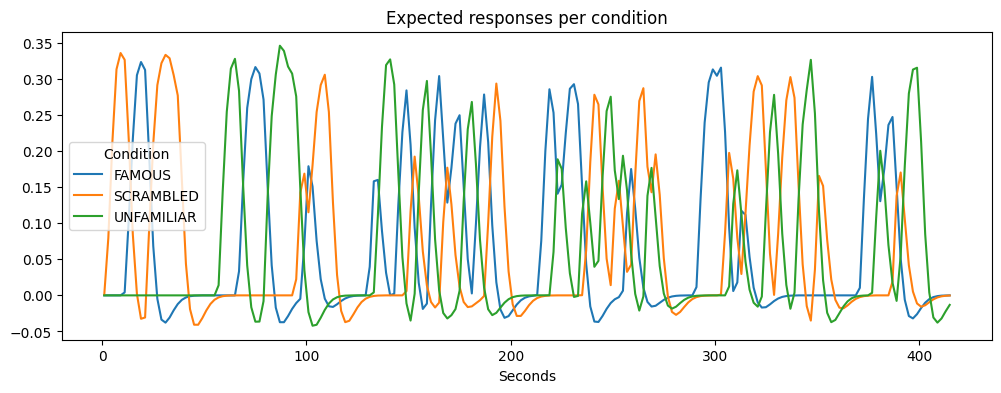

In [44]:
dm = design_matrices[0][['FAMOUS', 'SCRAMBLED', 'UNFAMILIAR']]
dm.columns.name = 'Condition'
dm.index.name = 'Seconds'
dm.plot(figsize=(12,4), title='Expected responses per condition')

**Q: How was this expected signal obtained?**

<Axes: xlabel='seconds', ylabel='degrees'>

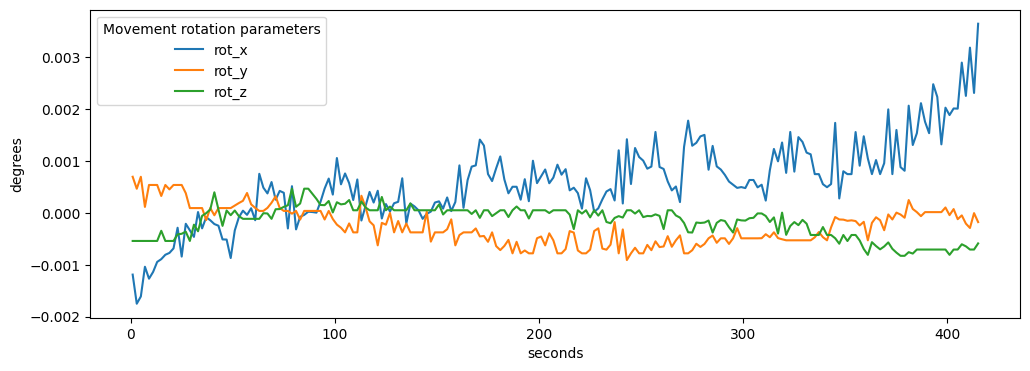

In [48]:
# let's see how the rotation movement parameters look
dm = design_matrices[0][['rot_x', 'rot_y', 'rot_z']]
dm.columns.name = 'Movement rotation parameters'
dm.plot(figsize=(12,4), ylabel='degrees', xlabel='seconds')

<Axes: xlabel='seconds', ylabel='mm'>

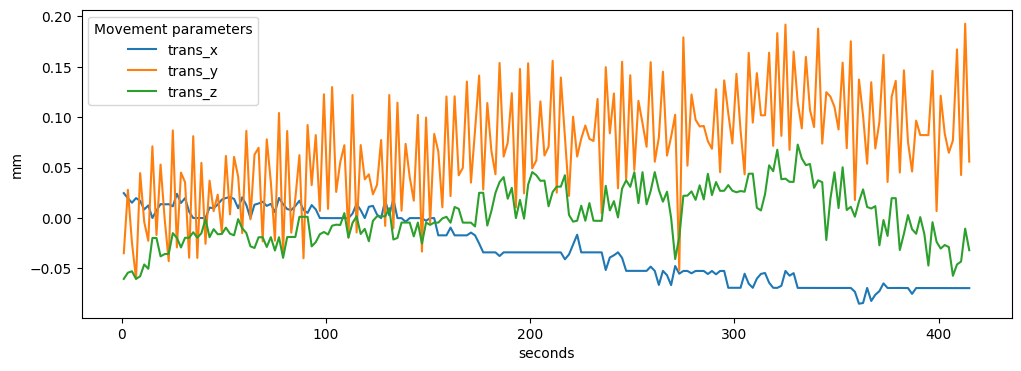

In [49]:
# let's see how the movement parameters look
dm = design_matrices[0][['trans_x', 'trans_y', 'trans_z']]
dm.columns.name = 'Movement parameters'
dm.plot(figsize=(12,4), ylabel='mm', xlabel='seconds')

We can also plot the actual design matrix. Let's plot it for the first run. 

Design matrix for run 1


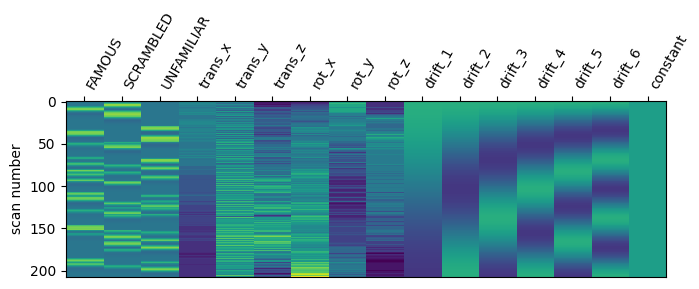

In [51]:
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

print('Design matrix for run', 1)
plot_design_matrix(design_matrices[0], output_file=None)

fig = plt.gcf()
fig.set_size_inches(8,2)
plt.show()

### Detecting voxels with significant effects
Now we will compute fixed effects of the 9 runs and generate related images.

#### Contrast specification
If we have the same number of regressors in each run, we can specify the contrast only for one run and it would automatically be reused for other runs.

However, in this dataset we can't do that. One of the subjects have one regressor less (the drift parameter) in one of the runs (because this run was shorter than the other runs; 170 vs 208 volumes).

Therefore, I here create contrasts for each run separately and add them to a list. 

In [54]:
contrast_list = []

for design_matrix in design_matrices:
    
    """A small routine to append zeros in contrast vectors"""
    n_columns = design_matrix.shape[1] #number of predictors in our model
    def pad_vector(contrast_, n_columns):    
        return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))
    
    contrasts = {'Famous_Unfamiliar': pad_vector([1, 0, -1], n_columns),
                'Unfamiliar_Famous': pad_vector([-1, 0, 1], n_columns),
                'Faces_Scrambled': pad_vector([1/2, -1, 1/2], n_columns),
                'Scrambled_Faces': pad_vector([-1/2, 1, -1/2], n_columns),
                 'EffectsOfInterest': np.eye(n_columns)[[0,1,2]]}
    
    contrast_list.append(contrasts)

Let’s look at the contrasts for the first run.

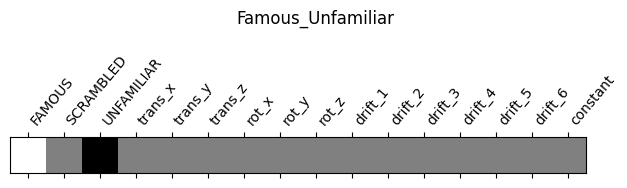

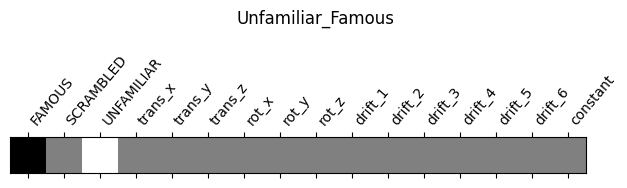

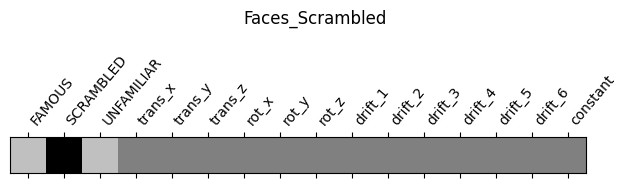

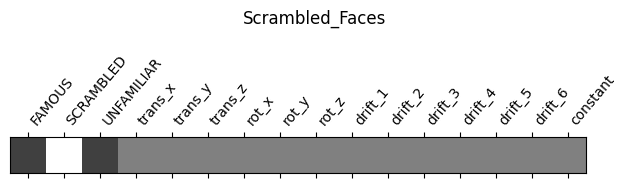

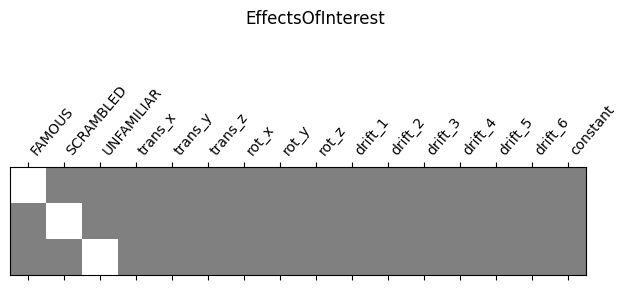

In [55]:
from nilearn.plotting import plot_contrast_matrix
for key, values in contrast_list[0].items():
    plot_contrast_matrix(values, design_matrix=design_matrices[0])
    plt.suptitle(key)

plt.show()

#### Computing result maps

You can compute the `effect size` maps, `t-statistics` maps, `z-scores` and some other types. See the [documentation](https://nilearn.github.io/dev/modules/generated/nilearn.glm.Contrast.html) for more information.

Below, we compute the estimated effect, which is expressed in BOLD signal units. However, this estimate does not come with statistical guarantees as it does not consider the associated variance.

In [57]:
eff_map = fmri_glm.compute_contrast(
    [c['Faces_Scrambled'] for c in contrast_list],
    output_type = 'effect_size'
)

# save the image on a file
eff_map.to_filename('sub-04_task-facerecognition_desc-FacesScrambled_effect_size.nii.gz')

To determine statistical significance, we form a t-statistic, which is then converted into a z-score. This conversion to z-scores standardizes the values to match a standard Gaussian distribution (with a mean of 0 and a variance of 1). This standardization facilitates the identification of significant effects in the data by comparing the observed values to what would be expected under the null hypothesis.

In [70]:
z_map = fmri_glm.compute_contrast(
    [c['Faces_Scrambled'] for c in contrast_list],
    output_type = 'z_score'
)

### Plotting thresholded maps

#### An arbitrary z-score threshold

Let's overlay the thresholded z-score map onto the subject's anatomical image, using an arbitrary threshold of 3.0 in z-score terms. 

See the `plot_stat_map` [documentation](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html) for all the possible parameters you can specify to the plot.

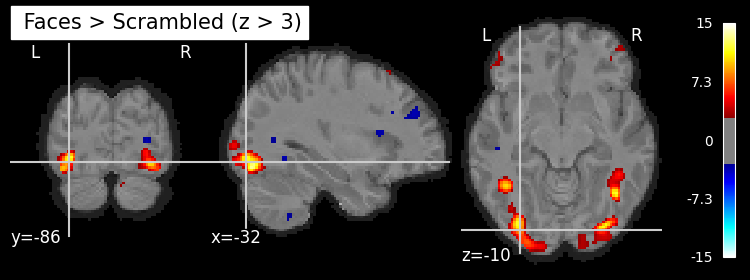

In [61]:
from nilearn.plotting import plot_stat_map

plot_stat_map(
    z_map, 
    bg_img = anat[0], 
    threshold=  3.0,
    display_mode = 'ortho', 
    black_bg = True,
    title =' Faces > Scrambled (z > 3)'
)
plt.show()

### Statistical signifiance testing
It's crucial to consider the statistical validity of the procedure. Although we've applied an arbitrary threshold of 3.0, the chosen threshold should offer assurances regarding the risk of false detections, also known as type-1 errors in statistics. A primary recommendation is to **control the false positive rate** (`fpr`) at a specific level, for instance, `p < .001`.

#### Control the false positive rate

Uncorrected p<.001 threshold: 3.291


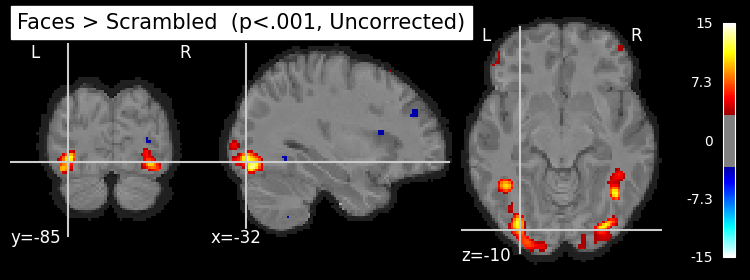

In [65]:
# Obtain the statistical threshold
from nilearn.glm.thresholding import threshold_stats_img

_, threshold = threshold_stats_img(
    z_map, 
    alpha = .001, 
    height_control = 'fpr'
)

print('Uncorrected p<.001 threshold: %.3f' % threshold)

# plot the thresholded map
plot_stat_map(
    z_map, 
    bg_img = anat[0], 
    threshold = 
    threshold,
    display_mode = 'ortho', 
    black_bg = True,
    title = 'Faces > Scrambled  (p<.001, Uncorrected)'
)
plt.show()

#### False Discovery Rate (FDR) correction

A commonly used alternative to controlling the 'false positive rate' in managing statistical errors is the **False Discovery Rate** (FDR) method, which addresses the expected proportion of false discoveries among all detections. However, in neuroimaging research, the appropriateness of FDR is subject to debate. While it is often preferred for exploratory or hypothesis-generating studies due to its balance between discovery and error control, it may be less favored in confirmatory studies where stricter error control is required.

FDR, p<.05 threshold: 3.377


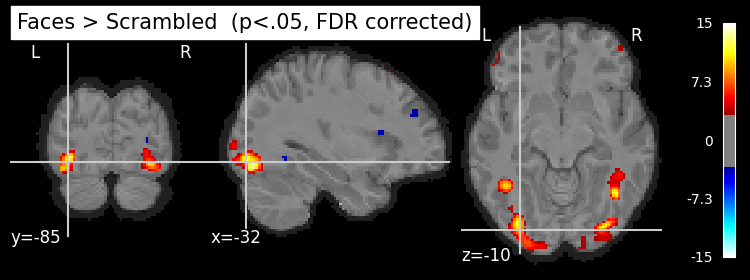

In [66]:
_, threshold = threshold_stats_img(
    z_map, 
    alpha = .05, 
    height_control = 'fdr'
)

print('FDR, p<.05 threshold: %.3f' % threshold)

plot_stat_map(
    z_map, 
    bg_img = anat[0], 
    threshold = threshold,
    display_mode = 'ortho', 
    black_bg = True,
    title = 'Faces > Scrambled  (p<.05, FDR corrected)'
)
plt.show()

#### Family Wise Error (FWE) correction

A more conservative approach is to control the **family-wise error rate** (FWER), which is the probability of making one or more false discoveries, or Type I errors, across all tests. This is typically set at 5%. The `Bonferroni correction` is a commonly used method to achieve this level of control.

Bonferroni-corrected, p<.05 threshold: 5.165


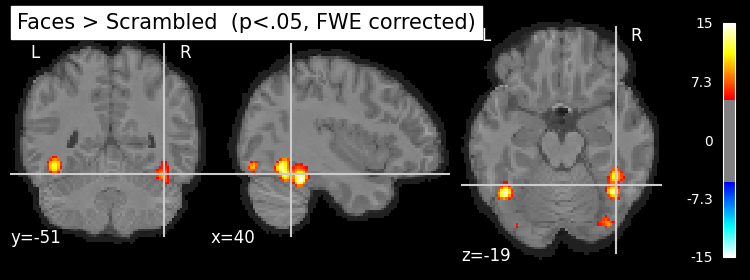

In [67]:
_, threshold = threshold_stats_img(
    z_map, 
    alpha = .05, 
    height_control = 'bonferroni')

print('Bonferroni-corrected, p<.05 threshold: %.3f' % threshold)

plot_stat_map(
    z_map, 
    bg_img = anat[0], 
    threshold = threshold,
    display_mode = 'ortho', 
    black_bg = True,
    title = 'Faces > Scrambled  (p<.05, FWE corrected)'
)
plt.show()

**Bonferroni correction on the number of voxels is not not appropriate for fMRI data!**

The Bonferroni correction, when applied directly to the number of voxels, is not appropriate for fMRI data. This is because neuroimaging data typically have spatially correlated data points, which violate the Bonferroni assumption of independent tests.

In Nilearn, Bonferroni correction is applied to the number of voxels, but this approach might not be ideal for the reasons mentioned. As an alternative, neuroscientists have developed **Random Field Theory** (RFT). This method accounts for the spatial correlation by applying multiple comparison correction in a way that considers the smoothness of the data. Specifically, the correction is applied to the number of '***resels'*** (RESolution ELements), rather than the raw number of voxels. However, it's important to note that this RFT-based approach is not implemented in Nilearn. At the second level, Nilearn provides an option for non-parametric inference with permutation testing, which is a more suitable approach for fMRI data when considering the spatial correlation of voxels. 


#### Cluster threshold

It's a common practice to discard isolated voxels from the images. It is possible to generate a thresholded map with small clusters removed by providing a `cluster_threshold` argument. Here clusters smaller than `20` voxels will be discarded from the `fpr` corrected map.

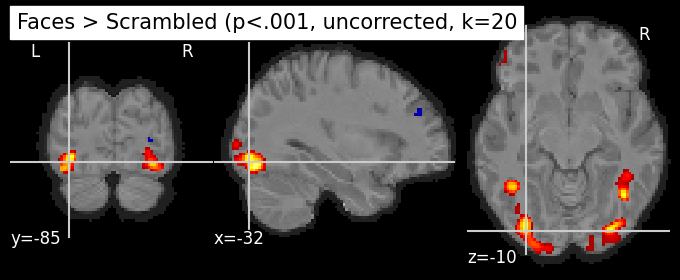

In [71]:
cluster_map, threshold = threshold_stats_img(
    z_map, 
    alpha = .001, 
    height_control='fpr', 
    cluster_threshold = 20
)

plot_stat_map(
    cluster_map, 
    bg_img = anat[0], 
    threshold = threshold,
    display_mode = 'ortho', 
    black_bg = True, 
    colorbar = False,
    title = 'Faces > Scrambled (p<.001, uncorrected, k=20'
)
plt.show()

### Maps for all contrasts

Computing contrasts
Contrast: Famous_Unfamiliar


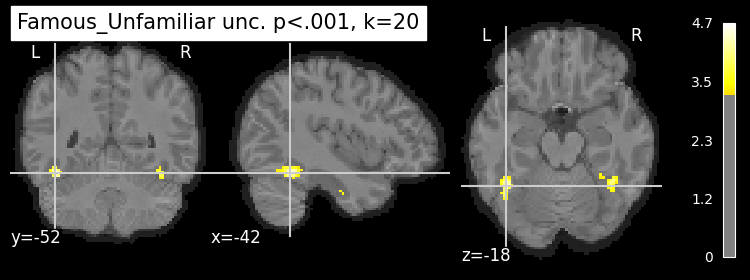

Contrast: Unfamiliar_Famous
	 Unfamiliar_Famous has no significant voxels.
Contrast: Faces_Scrambled


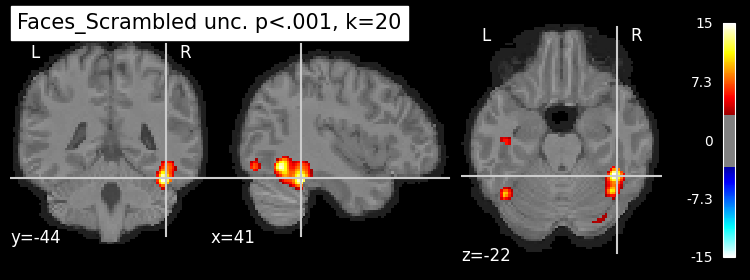

Contrast: Scrambled_Faces


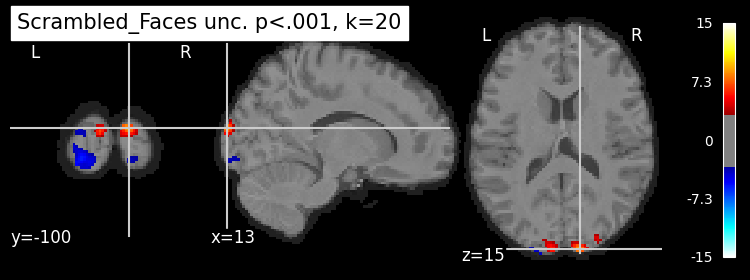

Contrast: EffectsOfInterest


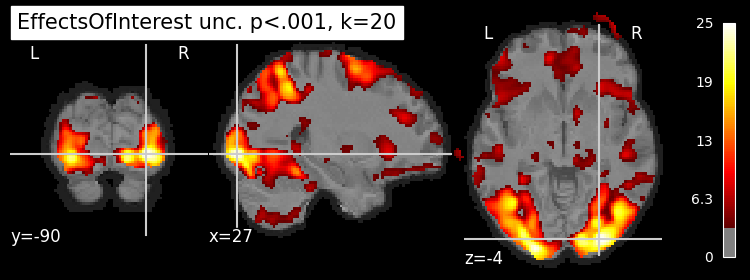

In [68]:
print('Computing contrasts')
import warnings
from nilearn import plotting
from nilearn.reporting import get_clusters_table

# Avoid getting warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Iterate on contrasts
    for contrast_id in contrast_list[0].keys():
        print("Contrast: %s" % contrast_id)
        # compute the contrasts
        z_map = fmri_glm.compute_contrast(
            [c[contrast_id] for c in contrast_list], output_type='z_score')
        # get threshold
        cluster_map, threshold = threshold_stats_img(z_map, alpha=.001, height_control='fpr', cluster_threshold=20)
        # get peak clusters    
        peaks = get_clusters_table(z_map, stat_threshold=threshold,
                               cluster_threshold=20)
        if len(peaks) != 0:
            peak_xyz = peaks.loc[0, ['X', 'Y','Z']]
            # plot
            plotting.plot_stat_map(
                cluster_map, 
                bg_img = anat[0], 
                threshold = threshold, 
                display_mode='ortho',
                cut_coords = peak_xyz, 
                black_bg = True, 
                title = contrast_id + ' unc. p<.001, k=20')
            plotting.show()
        else:
            print('\t', contrast_id, 'has no significant voxels.')

### The impact of first-level model parameters

Let's compare our original model with some other possible models to see how different parameters affect our results. 

**Note:** This is not to fish for results that most match our hypothesis!

Some examples we could explore,
* a model without slice_time_ref adjusted
* a model wiht different confounds
* a model with different noise models
* a model with a different hrf model (contrasts might need adjusting!)

Below, we will look at three different models. 

#### Our original result (model 1)

In [ ]:
"""
fmri_glm = FirstLevelModel(
    t_r = TR,
    slice_time_ref = 0.5,
    hrf_model = 'spm',
    drift_model = 'Cosine',
    high_pass = 1./128,
    smoothing_fwhm = 6,
    noise_model = 'ar1'
)

fmri_glm = fmri_glm.fit(bold, events, confounds_glm)

"""

Let's get aggain z-map of model1 results.

In [72]:
model1_z_map = fmri_glm.compute_contrast([c['Faces_Scrambled'] for c in contrast_list],
                                  output_type='z_score')

model1_title = 'Original model'

Let's remind us of how the model1's design matrix looks. 

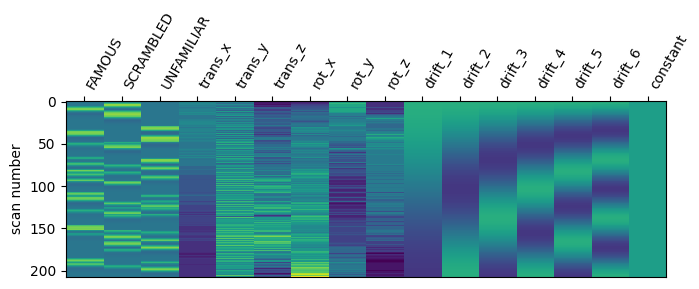

In [73]:
# ignore warnings about unused events columns
warnings.resetwarnings()
warnings.simplefilter('ignore')

# display the 1st design matrix to check if contrasts would need changing
design_matrices = fmri_glm.design_matrices_
plot_design_matrix(design_matrices[0], output_file=None)
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.show()

#### A model with no motion parameters as regressors (model 2)

model2 have all the same parameters as model1, but we don't include any confaunds. 

In [74]:
fmri_glm2 = fmri_glm.fit(bold, events)

# display the 1st design matrix to check if contrasts would need changing
design_matrices2 = fmri_glm2.design_matrices_
plot_design_matrix(design_matrices2[0], output_file=None)
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.show()

ValueError: File not found: '/imaging/correia/da05/workshops/2024-CBU/notebooks/../data/derivatives/fmriprep/sub-04/func/sub-04_task-facerecognition_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'

Need to redo contrasts, as the number of regressors in this model is different than in the original model.

In [ ]:
contrast_list2 = []
for design_matrix in design_matrices2:
    """A small routine to append zeros in contrast vectors"""
    n_columns = design_matrix.shape[1] #number of predictors in our model
    def pad_vector(contrast_, n_columns):    
        return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))
    
    contrasts = {'Faces_Scrambled': pad_vector([1/2, -1, 1/2], n_columns)}
    contrast_list2.append(contrasts)

In [ ]:
model2_z_map = fmri_glm2.compute_contrast([c['Faces_Scrambled'] for c in contrast_list2],
                                  output_type='z_score')

model2_title = 'No motion parameters'

#### Model with not accounting for slice time correction (model 3)

Next, let's create a model which includes the motion parameters, but does not account for slice time correction.

In [ ]:
fmri_glm3 = FirstLevelModel(
    t_r = TR,
    slice_time_ref = 0,
    hrf_model = 'spm',
    drift_model = 'Cosine',
    high_pass = 1./128,
    smoothing_fwhm = 6,
    noise_model = 'ar1', 
    minimize_memory = False
)

fmri_glm3 = fmri_glm3.fit(bold, events, confounds_glm)

# display the 1st design matrix to check if contrasts would need changing
design_matrices3 = fmri_glm3.design_matrices_
plot_design_matrix(design_matrices3[0], output_file=None)
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.show()

This model has the same regressors as model1, therefore we can use our original (model1) contrasts.

In [ ]:
model3_z_map = fmri_glm3.compute_contrast([c['Faces_Scrambled'] for c in contrast_list],
                                  output_type='z_score')

model3_title = 'Not accounting for slice time correction'

#### Plotting all 3 models
Now, let's plot all 3 models

In [ ]:
z_maps = [model1_z_map, model2_z_map, model3_z_map]
titles = [model1_title, model2_title, model3_title]

for (z_map, title) in zip(z_maps, titles):
    _, threshold = threshold_stats_img(z_map, alpha = .001, height_control = 'fpr')
    # plot the thresholded map
    plot_stat_map(z_map, bg_img = anat[0], threshold = threshold,
              display_mode = 'ortho', 
              cut_coords = [33, -72, -12],
              black_bg = True,
              title = title)
plt.show()

It appears that not including motion parameters, reduces power (max z-score 18 with motion parameters vs 15 - without). 

Not accounting for slice time correction does not seem to be a good idea. We should account for it!

## First Level for multiple subjects

Using a notebook like this is an effective method for preparing the final analysis script. Now, we can combine all the aforementioned elements into a unified, generic script that will conduct the first-level analysis.

**Example of a generic first-level script**: [code/first_level_script.py](https://github.com/dcdace/fMRI_training/blob/main/code/first_level_script.py)

The script in brief:

```python
...

# ======================================================================
# PERFORM SUBJECT LEVEL GLM ANALYSIS
# ======================================================================

# Initialize the BIDS layout and include the derivatives in it
layout = BIDSLayout(bids_path, derivatives=True)

# Get the TR value
TR = layout.get_tr()

# Define the GLM model
fmri_glm = FirstLevelModel(
    t_r = TR,
    noise_model = 'ar1',
    hrf_model = 'spm',
    drift_model = 'Cosine',
    high_pass = 1./128,
    slice_time_ref = 0.5, 
    smoothing_fwhm = 6,
    signal_scaling = False,
    minimize_memory = False
    )

# Get the preprocessed functional files
bold = layout.get(
    subject=sID, 
    datatype='func', 
    space='MNI152NLin2009cAsym', 
    desc='preproc', 
    extension='.nii.gz',
    return_type='filename'
    )

# Get the event files
events = layout.get(
    subject=sID, 
    datatype='func', 
    suffix='events', 
    extension=".tsv", 
    return_type='filename'
    )
# Get the confounds and select which ones to include in the design
confounds = layout.get(
    subject=sID, 
    datatype='func', 
    desc='confounds', 
    extension=".tsv", 
    return_type='filename'
    )
confounds_of_interest = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
confounds_glm = []
for conf_file in confounds:
    this_conf = pd.read_table(conf_file)
    conf_subset = this_conf[confounds_of_interest].fillna(0) # replace NaN with 0
    confounds_glm.append(conf_subset)

# Fit the model
fmri_glm = fmri_glm.fit(bold, events, confounds_glm)

# Create contrasts
design_matrices = fmri_glm.design_matrices_

contrast_list = []
for design_matrix in design_matrices:
    """A small routine to append zeros in contrast vectors"""
    n_columns = design_matrix.shape[1] #number of predictors in our model
    def pad_vector(contrast_, n_columns):    
        return np.hstack((contrast_, np.zeros(n_columns - len(contrast_))))
    contrasts = {
        'Famous': pad_vector([1, 0, 0], n_columns),
        'Unfamiliar': pad_vector([0, 0, 1], n_columns),
        'Scrambled': pad_vector([0, 1, 0], n_columns),
        'FamousUnfamiliar': pad_vector([1, 0, -1], n_columns),
        'UnfamiliarFamous': pad_vector([-1, 0, 1], n_columns),
        'FacesScrambled': pad_vector([1/2, -1, 1/2], n_columns),
        'ScrambledFaces': pad_vector([-1/2, 1, -1/2], n_columns),
        'EffectsOfInterest': np.eye(n_columns)[[0,1,2]]
        }
    contrast_list.append(contrasts)

# Compute the contrasts
stats_type = ['effect_size', 'z_score']
for stats in stats_type:
    for contrast_id in contrast_list[0].keys():    
        stats_map = fmri_glm.compute_contrast(
            [c[contrast_id] for c in contrast_list], 
            output_type = stats)
        # Save results following BIDS standart
        res_name = os.path.basename(bold[0]).split("run")[0]
        # from stats get only the part before _ for the BIDS file name
        stats_suffix = stats.split("_")[0]
        stats_map.to_filename(os.path.join(outdir, res_name + 'desc-' + contrast_id + '_' + stats_suffix + '.nii.gz'))

# ======================================================================
# CREATE THIS MODEL'S dataset_description.json FILE
# This is needed to use the results directory as BIDS data. 
# We will save our model parameters in the file as well, which is very useful
# ======================================================================

jason_file = os.path.join(ds, 'results', model_name, "dataset_description.json")

if not os.path.exists(jason_file):
    import json
    import datetime
    from importlib.metadata import version

    nilearn_version = version('nilearn')
    date_created = datetime.datetime.now()
    
    # Data to be written
    content = {
        "Name": "First-level GLM analysis",
        "BIDSVersion": "1.8.0",
        "DatasetType": "results",
        "GeneratedBy": [
            {
                "Name": "Nilearn",
                "Version": nilearn_version,
                "CodeURL": "https://nilearn.github.io"
            }
        ],    
        "Date": date_created,
        "FirstLevelModel": [
            fmri_glm.get_params()
        ], 
    }
    
    # Serializing json
    json_object = json.dumps(content, indent=4, default=str)
    
    # Writing to .json
    with open(jason_file, "w") as outfile:
        outfile.write(json_object)

```

Then we can write a project-specific script where we define the paths and use the `sbatch` command to execute the generic script for each subject in parallel using `SLURM`. 

**Example script to perform first-level analysis on multiple subjects**: [step08_first_level_analysis.sh](https://github.com/dcdace/fMRI_training/blob/main/code/step08_first_level_analysis.sh)

The script in brief:

```bash
# Your project's root directory
PROJECT_PATH='/imaging/correia/da05/workshops/2024-CBU'

# Location of the first-level python script
SCRIPT_PATH="$PROJECT_PATH"/code/first_level_script.py

...

for sub in "${SUBJECT_LIST[@]}"; do
     sbatch \
        --job-name=first_level \
        --cpus-per-task=16 \
        "$SCRIPT_PATH" "${PROJECT_PATH}" "${sub}"
done

```
